# Recipe Dataset Evaluations

Noah Meissner 25.07.2025

This Notebook, visualize and anlysis which dataset is more diverse in different Datasets

In [10]:
import pandas as pd
from foodrec.data.kochbar import KochbarLoader
from foodrec.data.all_recipe import AllRecipeLoader
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from foodrec.data.keto import KetoLoader


In [11]:
# Load All Recipe Dataset
AR = AllRecipeLoader()
df_all_recipe = AR.load_dataset()
all_recipe_train = AR.load_training_set()

# Load Kochbar Dataset
KB = KochbarLoader()
df_kochbar = KB.load_dataset()
kochbar_train = KB.load_training_set()

# Load Keto Dataset
KT = KetoLoader()
df_keto = KT.load_dataset()

## Descriptive Statistics

In [12]:
print("Total Recipes")
print(f"All Recipe Total Recipes: {len(df_all_recipe)} Recipes")
print(f"Kochbar Total Recipes: {len(df_kochbar)} Recipes")
print(f"Keto Total Recipes: {len(df_keto)} Recipes")
print(30*'#')
print("Amount Different Ingredients")
print(f"All Recipe Total Ingredients: {len(all_recipe_train)} Ingredients")
print(f"Kochbar Total Ingredients: {len(kochbar_train)} Ingredients")

Total Recipes
All Recipe Total Recipes: 40323 Recipes
Kochbar Total Recipes: 28243 Recipes
Keto Total Recipes: 488 Recipes
##############################
Amount Different Ingredients
All Recipe Total Ingredients: 3184 Ingredients
Kochbar Total Ingredients: 3003 Ingredients


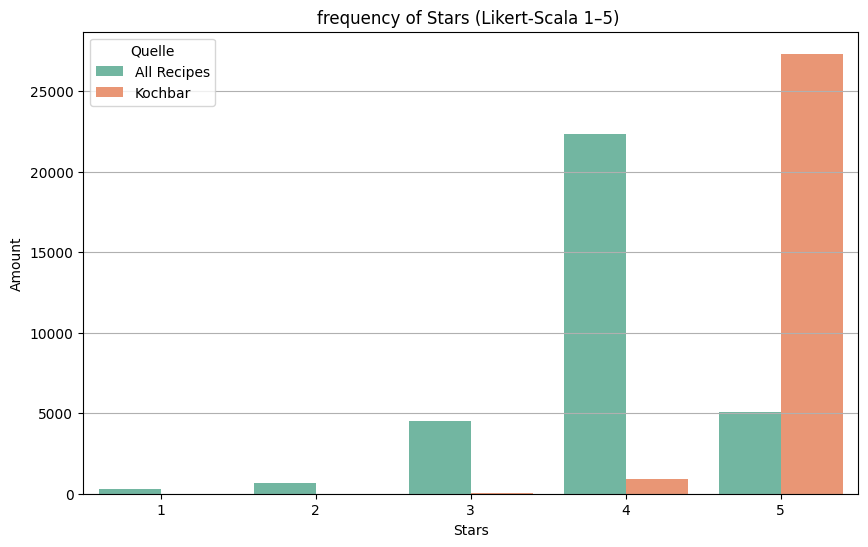

In [4]:
df1 = df_all_recipe[['rating_rate']].copy()
df1['source'] = 'All Recipes'

df2 = df_kochbar[['average_rate']].copy()
df2 = df2.rename(columns={'average_rate': 'rating_rate'})
df2['source'] = 'Kochbar'

combined = pd.concat([df1, df2], ignore_index=True)

combined = combined.dropna(subset=['rating_rate'])

combined['rating_rate'] = combined['rating_rate'].astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(data=combined, x='rating_rate', hue='source', palette='Set2')

plt.title('frequency of Stars (Likert-Scala 1–5) ')
plt.xlabel('Stars')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.legend(title='Quelle')
plt.show()


/var/folders/6n/knlq_sss74g85w6tq1mnlfk40000gn/T/ipykernel_79576/2598052112.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='source', y='cooking_time', palette='Set2')


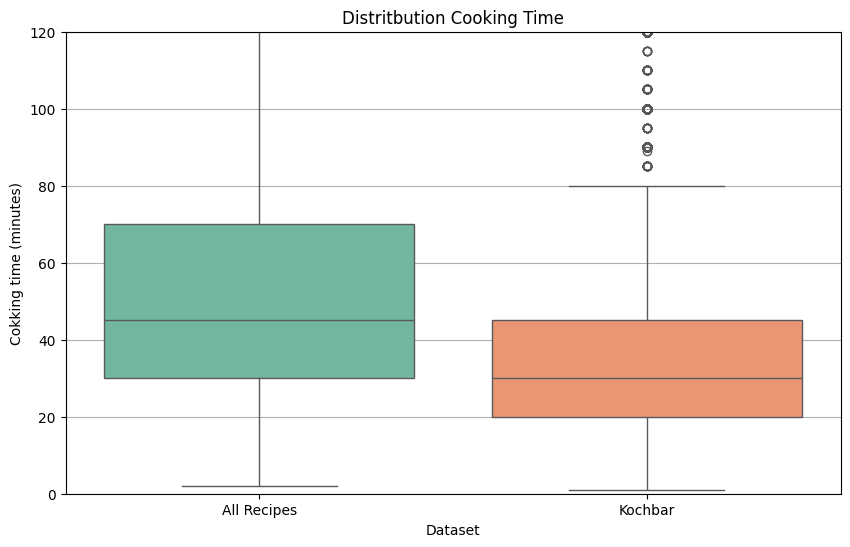

In [6]:
df1 = df_all_recipe[['cooking_time']].copy()
df1['source'] = 'All Recipes'

df2 = df_kochbar[['cooking_time']].copy()
df2 = df2.rename(columns={'average_rate': 'rating_rate'})
df2['source'] = 'Kochbar'

combined = pd.concat([df1, df2], ignore_index=True)

# Fehlende Werte in 'cooking_time' entfernen
combined = combined.dropna(subset=['cooking_time'])

# Optional: Falls cooking_time nicht numerisch ist, konvertiere zu int oder float
combined['cooking_time'] = combined['cooking_time'].astype(float)

# Boxplot zeichnen
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined, x='source', y='cooking_time', palette='Set2')

plt.title('Distritbution Cooking Time')
plt.xlabel('Dataset')
plt.ylabel('Cokking time (minutes)')
plt.grid(True, axis='y')
plt.ylim(0, 120)  # Y-Achse auf 0 bis 120 Minuten begrenzen
plt.show()


In [13]:
df_keto.head()

,id,recipe,category,prep_time_in_minutes,prep_time_note,cook_time_in_minutes,cook_time_note,difficulty,serving,measurement_1,...,directions_step_7,directions_step_8,directions_step_9,directions_step_10,image,image_creative_commons,calories,fat_in_grams,carbohydrates_in_grams,protein_in_grams
0,1,Chia And Blackberry Pudding,Breakfast Recipes,45.0,NaN,0.0,NaN,Easy,2.0,0.25,...,NaN,NaN,NaN,NaN,https://s3.us-west-004.backblazeb2.com/encurat...,True,437.0,38.0,8.0,8.0
1,2,Cinnamon Chiller,Breakfast Recipes,10.0,NaN,0.0,NaN,Easy,1.0,1.00,...,NaN,NaN,NaN,NaN,https://s3.us-west-004.backblazeb2.com/encurat...,True,145.0,4.0,1.6,0.6
2,3,Cheesy Low-Carb Omelet,Breakfast Recipes,5.0,NaN,5.0,NaN,Easy,5.0,2.00,...,Cover and cook on LOW for 1 minute,Serve and enjoy!,NaN,NaN,https://s3.us-west-004.backblazeb2.com/encurat...,True,451.0,36.0,3.0,33.0
3,4,Angel Eggs,Breakfast Recipes,30.0,NaN,0.0,NaN,Easy,2.0,4.00,...,NaN,NaN,NaN,NaN,https://s3.us-west-004.backblazeb2.com/encurat...,True,184.0,15.0,1.0,12.0
4,5,Roasted Onions And Green Beans,Breakfast Recipes,10.0,NaN,15.0,NaN,Easy,6.0,1.00,...,Parboil the green beans for 3 to 5 minutes in ...,Drain it and serve the beans with baked onion ...,Serve warm and enjoy!,NaN,https://s3.us-west-004.backblazeb2.com/encurat...,True,214.0,19.4,3.7,8.3


In [ ]:
['carbohydrates_in_grams','fat_in_grams','calories','protein_in_grams']

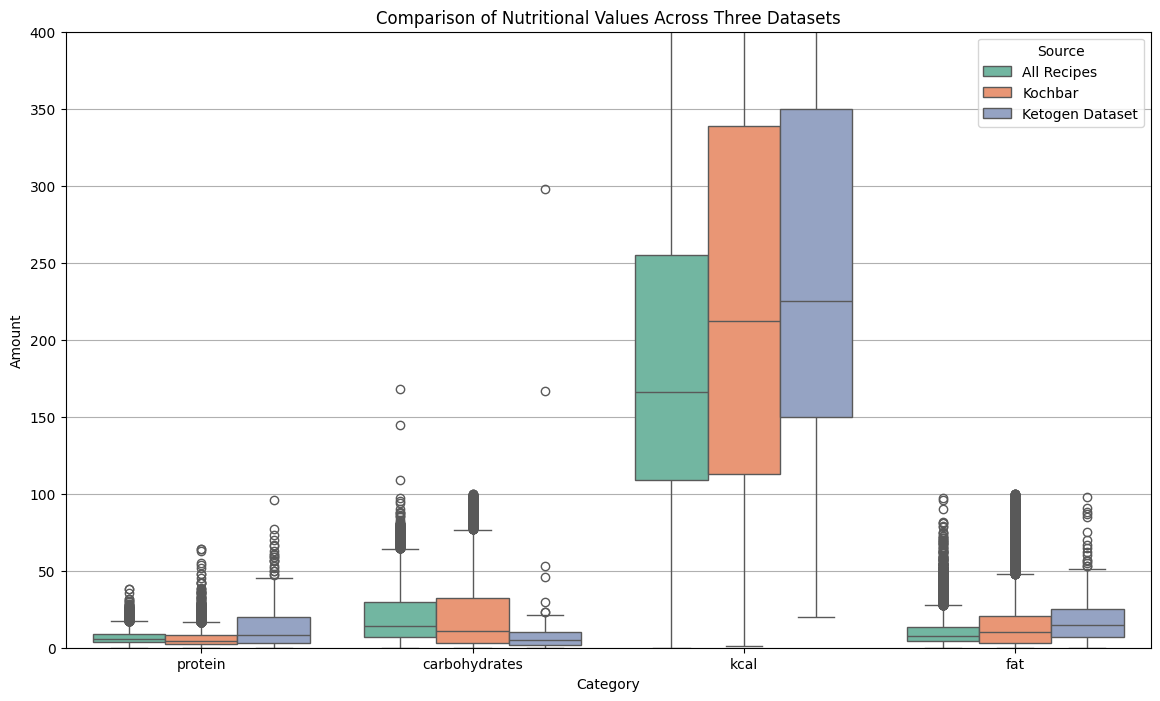

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. First two datasets (already named correctly)
df1 = df_all_recipe[['protein', 'carbohydrates', 'kcal', 'fat']].copy()
df1['source'] = 'All Recipes'
df1_long = df1.melt(id_vars='source', var_name='category', value_name='value')

df2 = df_kochbar[['protein', 'carbohydrates', 'kcal', 'fat']].copy()
df2['source'] = 'Kochbar'
df2_long = df2.melt(id_vars='source', var_name='category', value_name='value')

# 2. Third dataset - rename columns to match df1, df2
df3 = df_keto.rename(columns={
    'protein_in_grams': 'protein',
    'carbohydrates_in_grams': 'carbohydrates',
    'calories': 'kcal',
    'fat_in_grams': 'fat'
})[['protein', 'carbohydrates', 'kcal', 'fat']].copy()
df3['source'] = 'Ketogen Dataset'
df3_long = df3.melt(id_vars='source', var_name='category', value_name='value')

# 3. Combine all three
combined = pd.concat([df1_long, df2_long, df3_long], ignore_index=True)

# 4. Drop missing values (optional)
combined = combined.dropna(subset=['value'])

# 5. Plot boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined, x='category', y='value', hue='source', palette='Set2')

plt.title('Comparison of Nutritional Values Across Three Datasets')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.ylim(0, 400) 
plt.legend(title='Source')
plt.show()
